In [1]:
import pandas as pd
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio import SeqIO
import matplotlib.pyplot as plt

In [2]:
valid_chars = set('ACDEFGHIKLMNPQRSTVWY')

# Downloading positive data

## dbAMP3

### Information:
- link: https://awi.cuhk.edu.cn/dbAMP/download2024.php
- last update in 06/2024
- available data: 35600
- data downloaded: 35600
- formats available: xlsx, fasta

### Downloading:
- download tab was selected
- no filters or queries were applied
- Download All Antimicrobial peptides Sequence Data was selected
- the data was downloaded in xlsx format

### Standardization:

In [3]:
df_dbamp3 = pd.read_excel('data/dbAMP3.xlsx')
print(df_dbamp3.columns)
print(df_dbamp3.shape)

Index(['dbAMP_ID', 'Name', 'Source', 'Tax', 'Uniprot', 'PDB', 'Targets',
       'Seq'],
      dtype='object')
(35600, 8)


In [4]:
# select columns
df_dbamp3 = df_dbamp3[['Name', 'Seq']]

# add sequence length and Classification
df_dbamp3['Length'] = df_dbamp3['Seq'].apply(len)
df_dbamp3['Classification'] = 1

# rename columns
df_dbamp3.rename(columns={'Seq': 'Sequence'}, inplace=True)

# remove sequences with length < 10 or > 50
df_dbamp3 = df_dbamp3[(df_dbamp3['Length'] >= 10) & (df_dbamp3['Length'] <= 50)]

# display first few rows
df_dbamp3

,Name,Sequence,Length,Classification
0,Designed AMP No.1,FAAKHNGKSLFKPQN,15,1
1,Synthetic construct&&4A,AAAAGSVWGAVNYTSDCNGECKRRGYKGGYCGSFANVNCWCET,43,1
2,gag,AAANPGLLETSEGCRQIL,18,1
3,gag,AAAPAATLEEHMTACQGV,18,1
5,"jellyfish, Aurelia aurita&&Aurelin (jellyfish,...",AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,40,1
...,...,...,...,...
35595,Designed AMP No.78,LNFHAVRKLFIWIDA,15,1
35596,Designed AMP No.79,VHFYVAGQYWCRITNHKGRYV,21,1
35597,Designed AMP No.80,YKQTIAAHNWNYRKYAFCIQVRPYCV,26,1
35598,Designed AMP No.81,QRRMFRFPMHRFK,13,1


## DRAMP

### Information:
- link: http://dramp.cpu-bioinfor.org/downloads/
- last update in 09/2024
- available data: 30260
- data downloaded: 11612
- formats available: xlsx, txt, fasta

### Downloading:
- downloads tab was selected
- no filters or queries were applied
- General dataset was selected
- the data was downloaded in xlsx format 

### Standardization:

In [5]:
df_dramp = pd.read_excel('data/dramp.xlsx')
print(df_dramp.columns)
print(df_dramp.shape)

Index(['DRAMP_ID', 'Sequence', 'Sequence_Length', 'Name', 'Swiss_Prot_Entry',
       'Family', 'Gene', 'Source', 'Activity', 'Protein_existence',
       'Structure', 'Structure_Description', 'PDB_ID', 'Comments',
       'Target_Organism', 'Hemolytic_activity', 'Linear/Cyclic/Branched',
       'N-terminal_Modification', 'C-terminal_Modification',
       'Other_Modifications', 'Stereochemistry', 'Cytotoxicity',
       'Binding_Traget', 'Pubmed_ID', 'Reference', 'Author', 'Title'],
      dtype='object')
(11612, 27)


In [6]:
# select columns
df_dramp = df_dramp[['Name', 'Sequence', 'Sequence_Length']]

# rename columns
df_dramp.rename(columns={'Sequence_Length': 'Length'}, inplace=True)

# add Classification
df_dramp['Classification'] = 1

# remove sequences with length < 10 or > 50
df_dramp = df_dramp[(df_dramp['Length'] >= 10) & (df_dramp['Length'] <= 50)]

# display first few rows
df_dramp

,Name,Sequence,Length,Classification
0,Epicidin 280 (Bacteriocin),SLGPAIKATRQVCPKATRFVTVSCKKSDCQ,30,1
1,Microbisporicin A1 (Bacteriocin),VTSWSLCTPGCTSPGGGSNCSFCC,24,1
2,Ruminococcin A (RumA; Bacteriocin),GNGVLKTISHECNMNTWQFLFTCC,24,1
3,Lantibiotic michiganin-A (Bacteriocin),SSSGWLCTLTIECGTIICACR,21,1
5,Garvieacin Q (GarQ; Bacteriocin),EYHLMNGANGYLTRVNGKTVYRVTKDPVSAVFGVISNCWGSAGAGF...,50,1
...,...,...,...,...
11607,C18-PLL11,LLLLLLLLLLL,11,1
11608,C18-PLL23,LLLLLLLLLLLLLLLLLLLLLLL,23,1
11609,C18-PLL37,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL,37,1
11610,C18-PLL37,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL,37,1


## CAMPR3

### Information:
- link: http://www.camp3.bicnirrh.res.in/index.php
- last update unknown
- available data: 8164
- data downloaded: 4075
- formats available: -

### Downloading:
- due to the lack of download all option, the data was scraped using scrape.py script and saved into a csv file

### Standardization:

In [7]:
df_campr3 = pd.read_csv('data/campr3.csv')
print(df_campr3.columns)
print(df_campr3.shape)

Index(['Name', 'Sequence', 'Length'], dtype='object')
(4075, 3)


In [8]:
# add Classification
df_campr3['Classification'] = 1

# remove sequences with length < 10 or > 50
df_campr3 = df_campr3[(df_campr3['Length'] >= 10) & (df_campr3['Length'] <= 50)]

# display first few rows
df_campr3

,Name,Sequence,Length,Classification
62,HaA4,IGGYCSWLRL,10,1
63,Temporin-ECa,FLPGLLAGLL,10,1
64,Antifungal protein from coconut,EQCREEEDDR,10,1
65,Sesquin,KTCENLADTY,10,1
66,Gymnin,KTCENLADDY,10,1
...,...,...,...,...
4045,Beta-defensin 50,HPGTFHVRIKCMPKMTAVFGDNCSFYSSMGDLCNNTKSVCCMVPVR...,50,1
4046,Beta-defensin,KFKICERPNGSCRDFCLETEIHFGRCLNSRPCCLPLGHQPRIESTT...,50,1
4047,Defensin D1,KFCEKPSGTWSGVCGNSGACKDQCIRLEGAKHGSCNYKPPAHRCIC...,50,1
4048,Defensin D2,KFCEKPSGTWSGVCGNSGACKDQCIRLEGAKHGSCNYKLPAHRCIC...,50,1


## Merging Data Positive Data

### Statistics Before and After Cleaning

### Before Cleaning

In [9]:
df_positive = pd.concat([df_dbamp3, df_dramp, df_campr3], ignore_index=True)
df_positive.shape

(37274, 4)

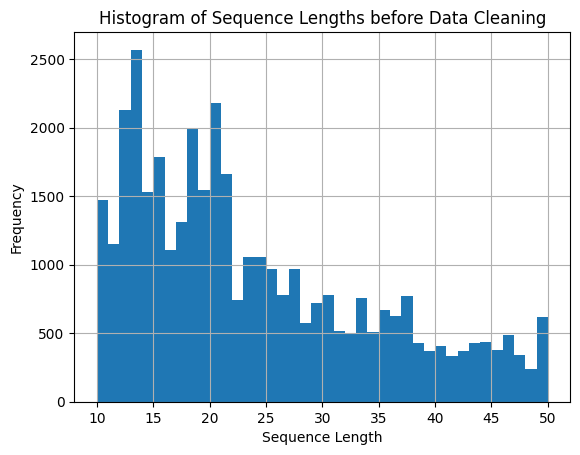

In [10]:
# plot histogram of sequence lengths
plt.figure()
plt.title('Histogram of Sequence Lengths before Data Cleaning')
df_positive['Length'].hist(bins=40)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

### Data Cleaning

In [11]:
# count and remove duplicates
print("removed rows with duplicates:")
df_positive[df_positive.duplicated('Sequence')]
print(df_positive.duplicated('Sequence').sum())
df_positive.drop_duplicates('Sequence', inplace=True)

# count and remove data with invalid characters
print("removed rows with invalid characters:")
df_positive['Valid'] = df_positive['Sequence'].apply(lambda x: set(x).issubset(valid_chars))
print(len(df_positive) - df_positive['Valid'].sum())
df_positive = df_positive[df_positive['Valid']]
df_positive.drop('Valid', axis=1, inplace=True)

removed rows with duplicates:
11700
removed rows with invalid characters:
3002


### After Cleaning

In [12]:
print(df_positive.shape)
df_positive.head()

(22572, 4)


,Name,Sequence,Length,Classification
0,Designed AMP No.1,FAAKHNGKSLFKPQN,15,1
1,Synthetic construct&&4A,AAAAGSVWGAVNYTSDCNGECKRRGYKGGYCGSFANVNCWCET,43,1
2,gag,AAANPGLLETSEGCRQIL,18,1
3,gag,AAAPAATLEEHMTACQGV,18,1
4,"jellyfish, Aurelia aurita&&Aurelin (jellyfish,...",AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,40,1


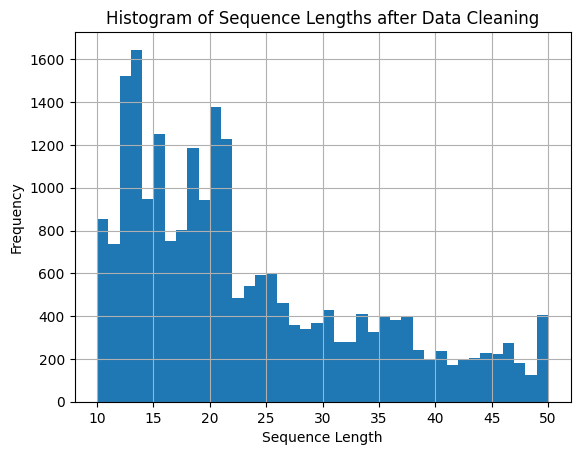

In [13]:
# plot histogram of sequence lengths
plt.figure()
plt.title('Histogram of Sequence Lengths after Data Cleaning')
df_positive['Length'].hist(bins=40)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# Downloading negativ data

## Uniprot

### Information:
- link: https://www.uniprot.org/
- last update in 02/2025
- available data: 253,206,170
- used data: 3 171 792
- formats available: fasta, tsv, excel, json, xml, rdf/xml, text, gff, list, embeddings

### Downloading:
- follwoing query was applied in search: (length:[10 TO 50]) NOT (keyword:KW-0929) NOT (keyword:KW-0930) NOT (keyword:KW-0295) NOT (keyword:KW-0964) NOT (keyword:KW-0809) NOT (keyword:KW-0929) NOT (keyword:KW-0211) NOT (keyword:KW-0078) NOT (keyword:KW-0295) NOT (keyword:KW-0812) NOT (keyword:KW-0800) NOT (keyword:KW-0051) NOT (keyword:KW-0930)
- downloaded all the data
- the data was downloaded in fasta format

### Standardization:

In [14]:
records = SeqIO.parse('data/uniprot.fasta', 'fasta')
data = [[record.id, str(record.seq), len(record.seq)] for record in records]
df_negative = pd.DataFrame(data, columns=['Name', 'Sequence', 'Length'])
df_negative['Classification'] = 0

df_negative

,Name,Sequence,Length,Classification
0,tr|A0A087WZT3|A0A087WZT3_HUMAN,MELSAEYLREKLQRDLEAEHVLPSPGGVGQVRGETAASETQLGS,44,0
1,sp|A0A2R8VHR8|DT3UO_MOUSE,MLKMSGWQRQSQNNSRNLRRECSRRKCIFIHHHT,34,0
2,tr|A6IP77|A6IP77_RAT,MGQRPPGVSNLRTLPILAVPTGTWAVGELTPD,32,0
3,tr|B7SCJ2|B7SCJ2_RAT,IYSNLANCNPNPENPVVVDHSVRVNSVGSSTSSTQPLLVHEDA,43,0
4,sp|C0HK49|DEF_NICSU,KDCKRESNTFPGICITKPPCRKACIREKFTDGHCSKILRRCLCTKPC,47,0
...,...,...,...,...
3171787,tr|Z9JNS9|Z9JNS9_9GAMM,MQGNAGRLDLKAVDHHDFFKPLRWTVRTGFCGIA,34,0
3171788,tr|Z9JNT2|Z9JNT2_9GAMM,MSLDARRLNTMNPNGTLAINTAHKQHCIGDPNPQSHHPTKPHHRIRDA,48,0
3171789,tr|Z9JNW0|Z9JNW0_9GAMM,MSGCALQGITTVQPWPDALLRVVVTAIPGGT,31,0
3171790,tr|Z9JPG6|Z9JPG6_9MICO,MKVRASLRSLVNKPGAQVVRRRGRLYVINKQNPRFKGRQKG,41,0


## Statistics Before and After Cleaning

### Before Cleaning

In [15]:
df_negative.shape

(3171792, 4)

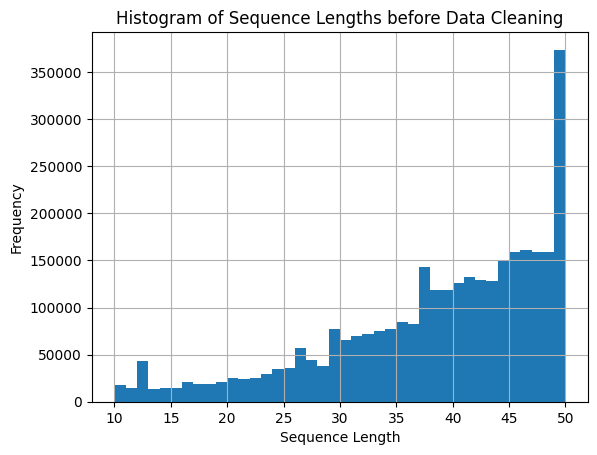

In [16]:
# plot histogram of sequence lengths
plt.figure()
plt.title('Histogram of Sequence Lengths before Data Cleaning')
df_negative['Length'].hist(bins=40)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

### Data Cleaning

In [17]:
# count and remove duplicates
print("removed rows with duplicates:")
df_negative[df_negative.duplicated('Sequence')]
print(df_negative.duplicated('Sequence').sum())
df_negative.drop_duplicates('Sequence', inplace=True)

# count and remove data with invalid characters
print("removed rows with invalid characters:")
df_negative['Valid'] = df_negative['Sequence'].apply(lambda x: set(x).issubset(valid_chars))
print(len(df_negative) - df_negative['Valid'].sum())
df_negative = df_negative[df_negative['Valid']]
df_negative.drop('Valid', axis=1, inplace=True)

removed rows with duplicates:
551498
removed rows with invalid characters:
19846


C:\Users\Ignacy\AppData\Local\Temp\ipykernel_19108\1185366275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative.drop('Valid', axis=1, inplace=True)


### After Cleaning

In [18]:
df_negative.shape

(2600448, 4)

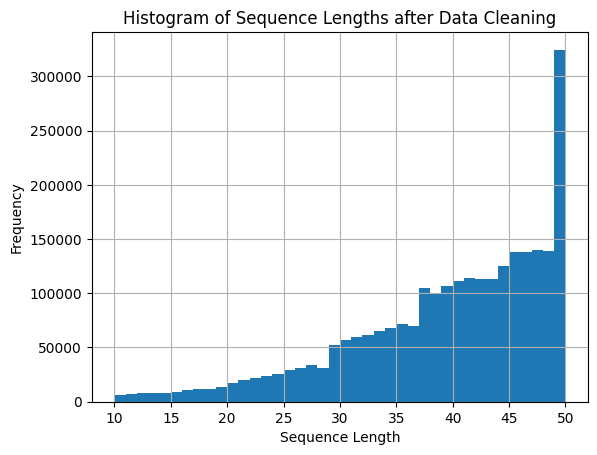

In [19]:
# plot histogram of sequence lengths
plt.figure()
plt.title('Histogram of Sequence Lengths after Data Cleaning')
df_negative['Length'].hist(bins=40)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

## Compare and adjust to the positive data

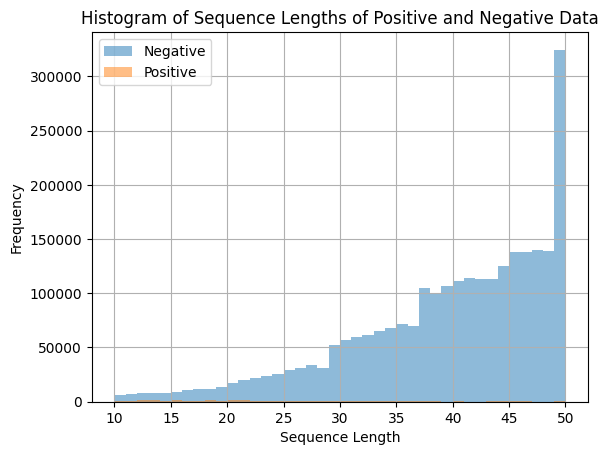

In [20]:
# plot histogram of sequence lengths
plt.figure()
plt.title('Histogram of Sequence Lengths of Positive and Negative Data')
df_negative['Length'].hist(bins=40, alpha=0.5, label='Negative')
df_positive['Length'].hist(bins=40, alpha=0.5, label='Positive')
plt.legend()
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

We see huge data inbalance so we need to adjust negative data to the positive data. We will use the same number of negative data as the positive data.

In [21]:
# undersample negative data at each length to match positive data
lengths = df_positive['Length'].unique()
df_negative_sampled = pd.DataFrame()
for length in lengths:
    df_negative_sampled = pd.concat([df_negative_sampled, df_negative[df_negative['Length'] == length].sample(n=df_positive['Length'].value_counts()[length])])

df_negative_sampled.shape

(22572, 4)

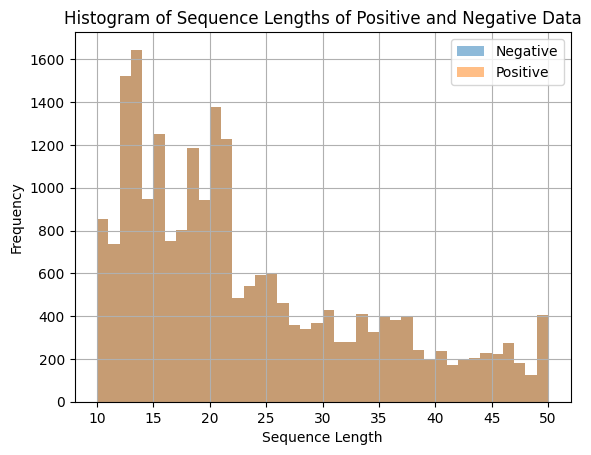

In [22]:
# plot histogram of sequence lengths
plt.figure()
plt.title('Histogram of Sequence Lengths of Positive and Negative Data')
df_negative_sampled['Length'].hist(bins=40, alpha=0.5, label='Negative')
df_positive['Length'].hist(bins=40, alpha=0.5, label='Positive')
plt.legend()
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# Analysing the Final Dataset

## Merging Data

In [23]:
# combine positive and negative data
df = pd.concat([df_positive, df_negative_sampled], ignore_index=True)
df.shape

(45144, 4)

In [24]:
# count and remove duplicates
print("removed rows with duplicates:")
df[df.duplicated('Sequence')]
print(df.duplicated('Sequence').sum())
df.drop_duplicates('Sequence', inplace=True)

removed rows with duplicates:
6


In [25]:
df['Classification'].value_counts()

Classification
1    22572
0    22566
Name: count, dtype: int64

## Calculating Sequence Statistics

In [26]:
df['Molecular_Weight'] = df['Sequence'].apply(lambda seq: molecular_weight(seq, seq_type='protein'))
df['Isoelectric_Point'] = df['Sequence'].apply(lambda seq: ProteinAnalysis(seq).isoelectric_point())
df['Amino_Acid_Composition'] = df['Sequence'].apply(lambda seq: ProteinAnalysis(seq).count_amino_acids())
df['Hydrophobicity'] = df['Sequence'].apply(lambda seq: ProteinAnalysis(seq).gravy())
df['Instability_Index'] = df['Sequence'].apply(lambda seq: ProteinAnalysis(seq).instability_index())

df

,Name,Sequence,Length,Classification,Molecular_Weight,Isoelectric_Point,Amino_Acid_Composition,Hydrophobicity,Instability_Index
0,Designed AMP No.1,FAAKHNGKSLFKPQN,15,1,1686.9107,10.302064,"{'A': 2, 'C': 0, 'D': 0, 'E': 0, 'F': 2, 'G': ...",-1.013333,7.233333
1,Synthetic construct&&4A,AAAAGSVWGAVNYTSDCNGECKRRGYKGGYCGSFANVNCWCET,43,1,4527.9440,7.842273,"{'A': 6, 'C': 5, 'D': 1, 'E': 2, 'F': 1, 'G': ...",-0.346512,29.088372
2,gag,AAANPGLLETSEGCRQIL,18,1,1843.0668,4.531511,"{'A': 3, 'C': 1, 'D': 0, 'E': 2, 'F': 0, 'G': ...",0.077778,39.944444
3,gag,AAAPAATLEEHMTACQGV,18,1,1770.9810,4.507355,"{'A': 6, 'C': 1, 'D': 0, 'E': 2, 'F': 0, 'G': ...",0.338889,63.388889
4,"jellyfish, Aurelia aurita&&Aurelin (jellyfish,...",AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,40,1,4302.9452,9.126870,"{'A': 4, 'C': 6, 'D': 2, 'E': 1, 'F': 2, 'G': ...",-0.457500,31.572500
...,...,...,...,...,...,...,...,...,...
45139,tr|A0A8C7AXN2|A0A8C7AXN2_NEOVI,MASQNRDPAAASVAAARKGAEHSGGAARGPVGKRLQQELMTLMNQT...,50,0,5173.9116,10.834315,"{'A': 10, 'C': 0, 'D': 1, 'E': 2, 'F': 0, 'G':...",-0.194000,31.558000
45140,tr|H0SRF9|H0SRF9_BRAS3,MLLRLTGHDDARVDLTPVDLSSFEGSLREADQRQYATDDEIKAIWA...,50,0,5674.2754,4.791664,"{'A': 5, 'C': 0, 'D': 7, 'E': 3, 'F': 1, 'G': ...",-0.546000,26.850000
45141,tr|A0A9Q6F244|A0A9Q6F244_9BACI,MKFLLDFFANWTFDKVMDYSLVAVIWFVFKSKSKQNEYLDDFEERR...,50,0,6339.1720,6.160176,"{'A': 2, 'C': 0, 'D': 6, 'E': 3, 'F': 7, 'G': ...",-0.496000,29.508000
45142,tr|X0PCK7|X0PCK7_9LACO,MVNIQLNELDVNGKQTPDLKTHILGYQDEMIILDNKKSISMDDIRH...,50,0,5794.5893,4.734995,"{'A': 0, 'C': 0, 'D': 6, 'E': 3, 'F': 0, 'G': ...",-0.430000,60.216000


In [47]:
df.describe()

,Length,Classification,Molecular_Weight,Isoelectric_Point,Hydrophobicity,Instability_Index
count,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000
mean,22.857836,0.500066,2610.179499,8.458262,-0.189194,41.074164
std,10.454980,0.500006,1165.152365,2.589647,0.891444,40.192253
min,10.000000,0.000000,776.792300,4.050028,-4.500000,-73.339583
25%,14.000000,0.000000,1691.077375,5.954987,-0.725000,15.276520
50%,20.000000,1.000000,2295.645600,9.120423,-0.191667,35.809524
75%,29.000000,1.000000,3271.742600,10.477740,0.373333,59.860000
max,50.000000,1.000000,6581.010600,11.999968,3.800000,541.171429


## Data Visualization

### Length Distribution

C:\Users\Ignacy\AppData\Local\Temp\ipykernel_19108\519810754.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


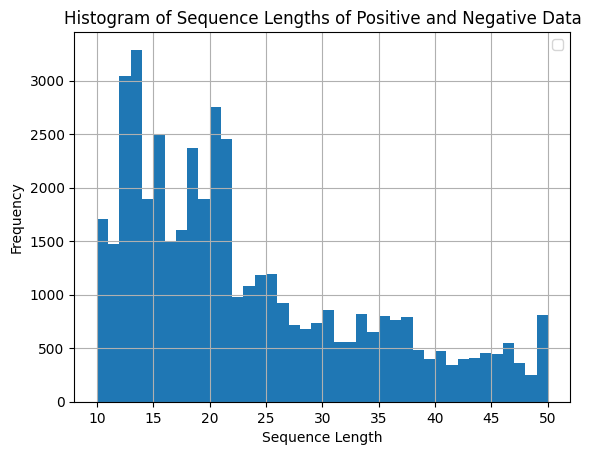

In [27]:
# plot histogram of sequence lengths
plt.figure()
plt.title('Histogram of Sequence Lengths of Positive and Negative Data')
df['Length'].hist(bins=40)
plt.legend()
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

### Molecular Weight Distribution

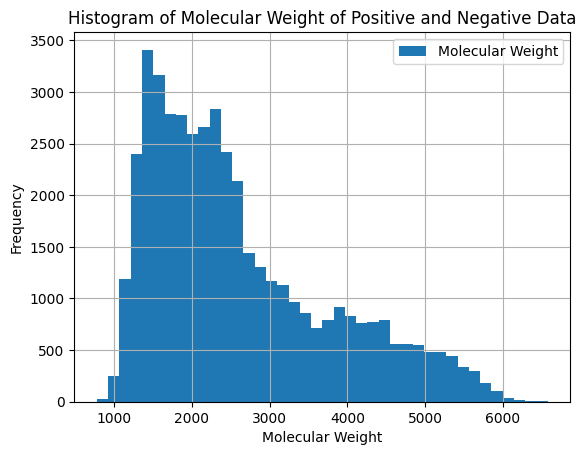

In [29]:
# plot histogram of molecular weight
plt.figure()
plt.title('Histogram of Molecular Weight of Positive and Negative Data')
df['Molecular_Weight'].hist(bins=40, label='Molecular Weight')
plt.legend()
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')
plt.show()

### Isoelectric Point Distribution

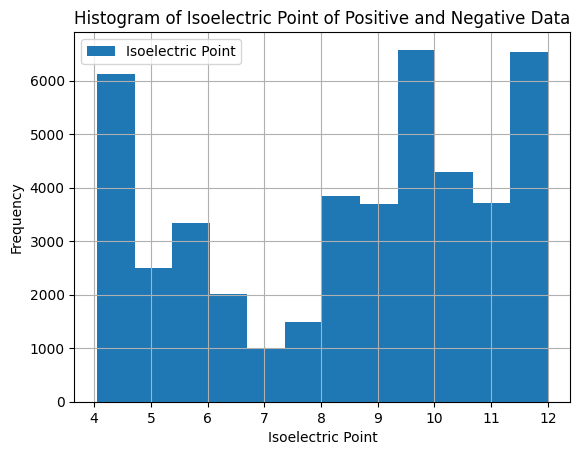

In [34]:
# plot histogram of isoelectric point
plt.figure()
plt.title('Histogram of Isoelectric Point of Positive and Negative Data')
df['Isoelectric_Point'].hist(bins=12, label='Isoelectric Point')
plt.legend()
plt.xlabel('Isoelectric Point')
plt.ylabel('Frequency')
plt.show()

### Hydrophobicity Distribution

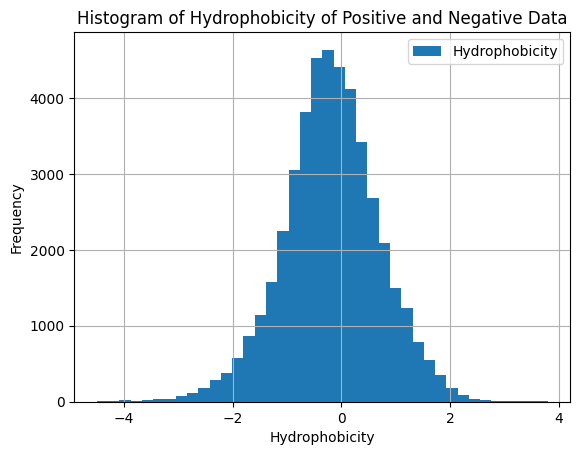

In [38]:
# plot histogram of hydrophobicity
plt.figure()
plt.title('Histogram of Hydrophobicity of Positive and Negative Data')
df['Hydrophobicity'].hist(bins=40, label='Hydrophobicity')
plt.legend()
plt.xlabel('Hydrophobicity')
plt.ylabel('Frequency')
plt.show()

### Hydrophobicity Index Distribution

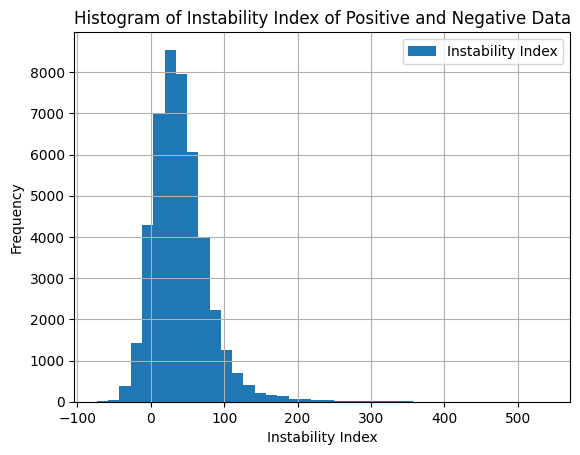

In [44]:
# plot histogram of instability index
plt.figure()
plt.title('Histogram of Instability Index of Positive and Negative Data')
df['Instability_Index'].hist(bins=40, label='Instability Index')
plt.legend()
plt.xlabel('Instability Index')
plt.ylabel('Frequency')
plt.show()

### Amino Acid Composition

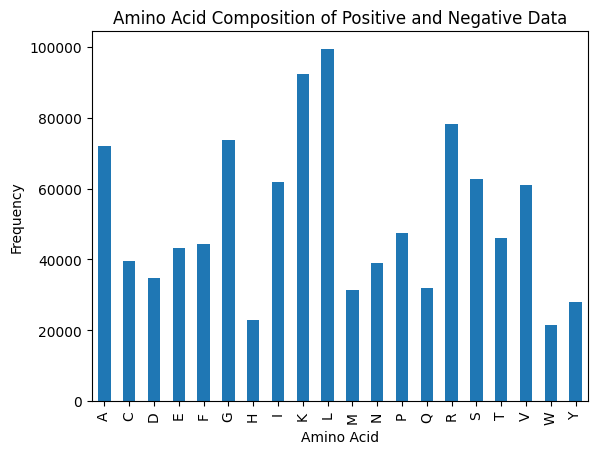

In [46]:
# plot amino acid composition
plt.figure()
plt.title('Amino Acid Composition of Positive and Negative Data')
df['Amino_Acid_Composition'].apply(lambda x: pd.Series(x)).sum().plot(kind='bar')
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.show()